In [163]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit.circuit.random import random_circuit
from qiskit import Aer
import numpy as np

In [207]:
nqbit = 1
qctrl = QuantumRegister(1,'qctrl')
qreg0 = QuantumRegister(nqbit,'q0')
qreg1 = QuantumRegister(nqbit,'q1')
# creg = ClassicalRegister(1)
qc = QuantumCircuit(qctrl, qreg0, qreg1)

In [208]:
qc.h(qctrl)
qc.barrier()

In [209]:
def get_state(nqbit):
    state = np.random.rand(2**nqbit)
    return state / np.linalg.norm(state)

for i in range(nqbit):
    # qc.x(qreg0[i])
    qc.rx(np.pi/4, qreg0[i])
    qc.h(qreg0[i])

for i in range(nqbit):
    qc.h(qreg1[i])

qc.barrier()

In [210]:
# for i in range(nqbit):
#     qc.cz(qctrl,qreg0[i])
# for i in range(nqbit):
#     qc.cz(qctrl,qreg1[i])

# qc.barrier()

In [211]:
for i in range(nqbit):
    qc.cx(qreg0[i],qreg1[i])

qc.barrier()

In [212]:
qc.h(qctrl)
for i in range(nqbit):
    qc.h(qreg0[i])

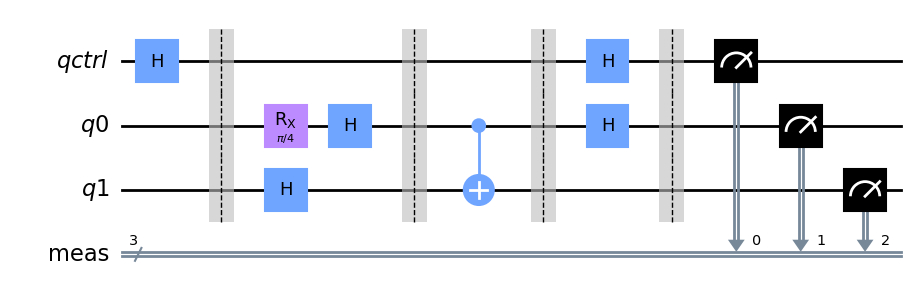

In [213]:
qc_measure = qc.measure_all(inplace=False)
# qc.measure(qctrl, creg[0])
qc_measure.draw('mpl')

In [214]:

backend = Aer.get_backend('aer_simulator')
job = backend.run(qc_measure, shots=10000)
result = job.result()
counts = result.get_counts()

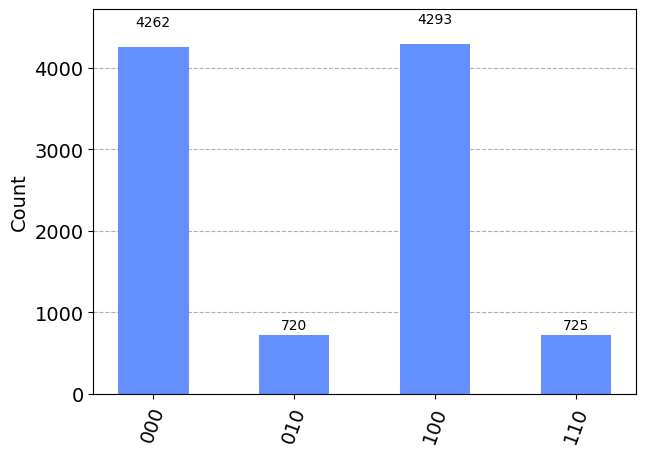

In [215]:
from qiskit.visualization import plot_histogram 
plot_histogram(counts)

In [216]:
from qiskit.opflow import CircuitSampler, StateFn, TensoredOp, Z, I
from qiskit.utils import QuantumInstance

quantum_instance = QuantumInstance(backend)
circuit_sampler = CircuitSampler(quantum_instance)

In [217]:
circuit_sampler.convert(StateFn(qc))

DictStateFn({'110': 0.24407030237208294, '100': 0.6457493224928695, '010': 0.2651650429449553, '000': 0.673145600891813}, coeff=1.0, is_measurement=False)

In [ ]:
one_op = (I - Z) / 2
observable = TensoredOp((2*nqbit - 1) * [I]) ^ one_op